In [1]:
import yt
import numpy             as np
import matplotlib.pyplot as plt


from   astropy.table import QTable
import astropy.constants as c
import astropy.units     as u


dir_main    = "/mnt/sdceph/users/smenon/RHDSphereKrome/" 
dirs_prfx   = "GalaxyICsHydroDef"

dir_control = dir_main +dirs_prfx
dir_allr    = dir_main +dirs_prfx +"AllBands"
dir_sne     = dir_main +dirs_prfx +"SNeOnly"
dir_both    = dir_main +dirs_prfx +"SNeRHD"


fils_prfx   = "/RHDTurb_hdf5_"
ftype_plot  = fils_prfx +"plt_cnt_"
ftype_part  = fils_prfx +"part_"
file_num    = "{:04d}"

dirs        = [dir_control, dir_allr, dir_sne, dir_both]
Ns_done     = [201,         381,      130,     63]

/mnt/sw/nix/store/ra5wbxf51x3xx6i9dz7kw8pcbxviwzcg-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/mnt/sw/nix/store/ra5wbxf51x3xx6i9dz7kw8pcbxviwzcg-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


In [2]:
plots_4x, parts_4x = [[[dir+ftype+file_num.format(n) for n     in range(N)               ]
                                                     for dir,N in zip(dirs,Ns_done)      ]
                                                     for ftype in [ftype_plot,ftype_part]]
                                                      #the order of the for statements are in reverse order of hierarchy
                                                      #ie the first level splits into plot/particle files, 
                                                      #then into the four cases, 
                                                      #then into timeslices

In [3]:
%%time
ts_4x = [[yt.load(file).current_time.in_units('yr') for file in pfiles    ]
                                                    for pfiles in plots_4x]


/mnt/sw/nix/store/ra5wbxf51x3xx6i9dz7kw8pcbxviwzcg-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/mnt/sw/nix/store/ra5wbxf51x3xx6i9dz7kw8pcbxviwzcg-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
yt : [INFO     ] 2025-02-06 07:44:35,359 Particle file found: RHDTurb_hdf5_part_0000
yt : [INFO     ] 2025-02-06 07:44:35,429 Parameters: current_time              = 0.0
yt : [INFO     ] 2025-02-06 07:44:35,430 Parameters: domain_dimensions         = [16 16 16]
yt : [INFO     ] 2025-02-06 07:44:35,432 Parameters: domain_left_edge          = [-4.31995267e+21 -4.31995267e+21 -4.31995267e+21]
yt : [INFO     ] 2025-02-06 07:44:35,434 Parameters: domain_ri

CPU times: user 1min 3s, sys: 18.5 s, total: 1min 21s
Wall time: 6min 7s


In [4]:
%%time
Mgas_4x = [[np.nansum(
                yt.load(file).all_data()['mass'].in_units('solMass')) for file   in pfiles  ]
                                                                      for pfiles in plots_4x]


yt : [INFO     ] 2025-02-06 07:50:42,967 Particle file found: RHDTurb_hdf5_part_0000
yt : [INFO     ] 2025-02-06 07:50:43,016 Parameters: current_time              = 0.0
yt : [INFO     ] 2025-02-06 07:50:43,018 Parameters: domain_dimensions         = [16 16 16]
yt : [INFO     ] 2025-02-06 07:50:43,019 Parameters: domain_left_edge          = [-4.31995267e+21 -4.31995267e+21 -4.31995267e+21]
yt : [INFO     ] 2025-02-06 07:50:43,021 Parameters: domain_right_edge         = [4.31995267e+21 4.31995267e+21 4.31995267e+21]
yt : [INFO     ] 2025-02-06 07:50:43,022 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2025-02-06 07:50:44,305 Particle file found: RHDTurb_hdf5_part_0001
yt : [INFO     ] 2025-02-06 07:50:44,355 Parameters: current_time              = 3902250095523.4453
yt : [INFO     ] 2025-02-06 07:50:44,356 Parameters: domain_dimensions         = [16 16 16]
yt : [INFO     ] 2025-02-06 07:50:44,358 Parameters: domain_left_edge          = [-4.31995267e+21 -4.31995267e+21 -4.31

KeyboardInterrupt: 

In [5]:
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['mathtext.fontset'] = 'stix'

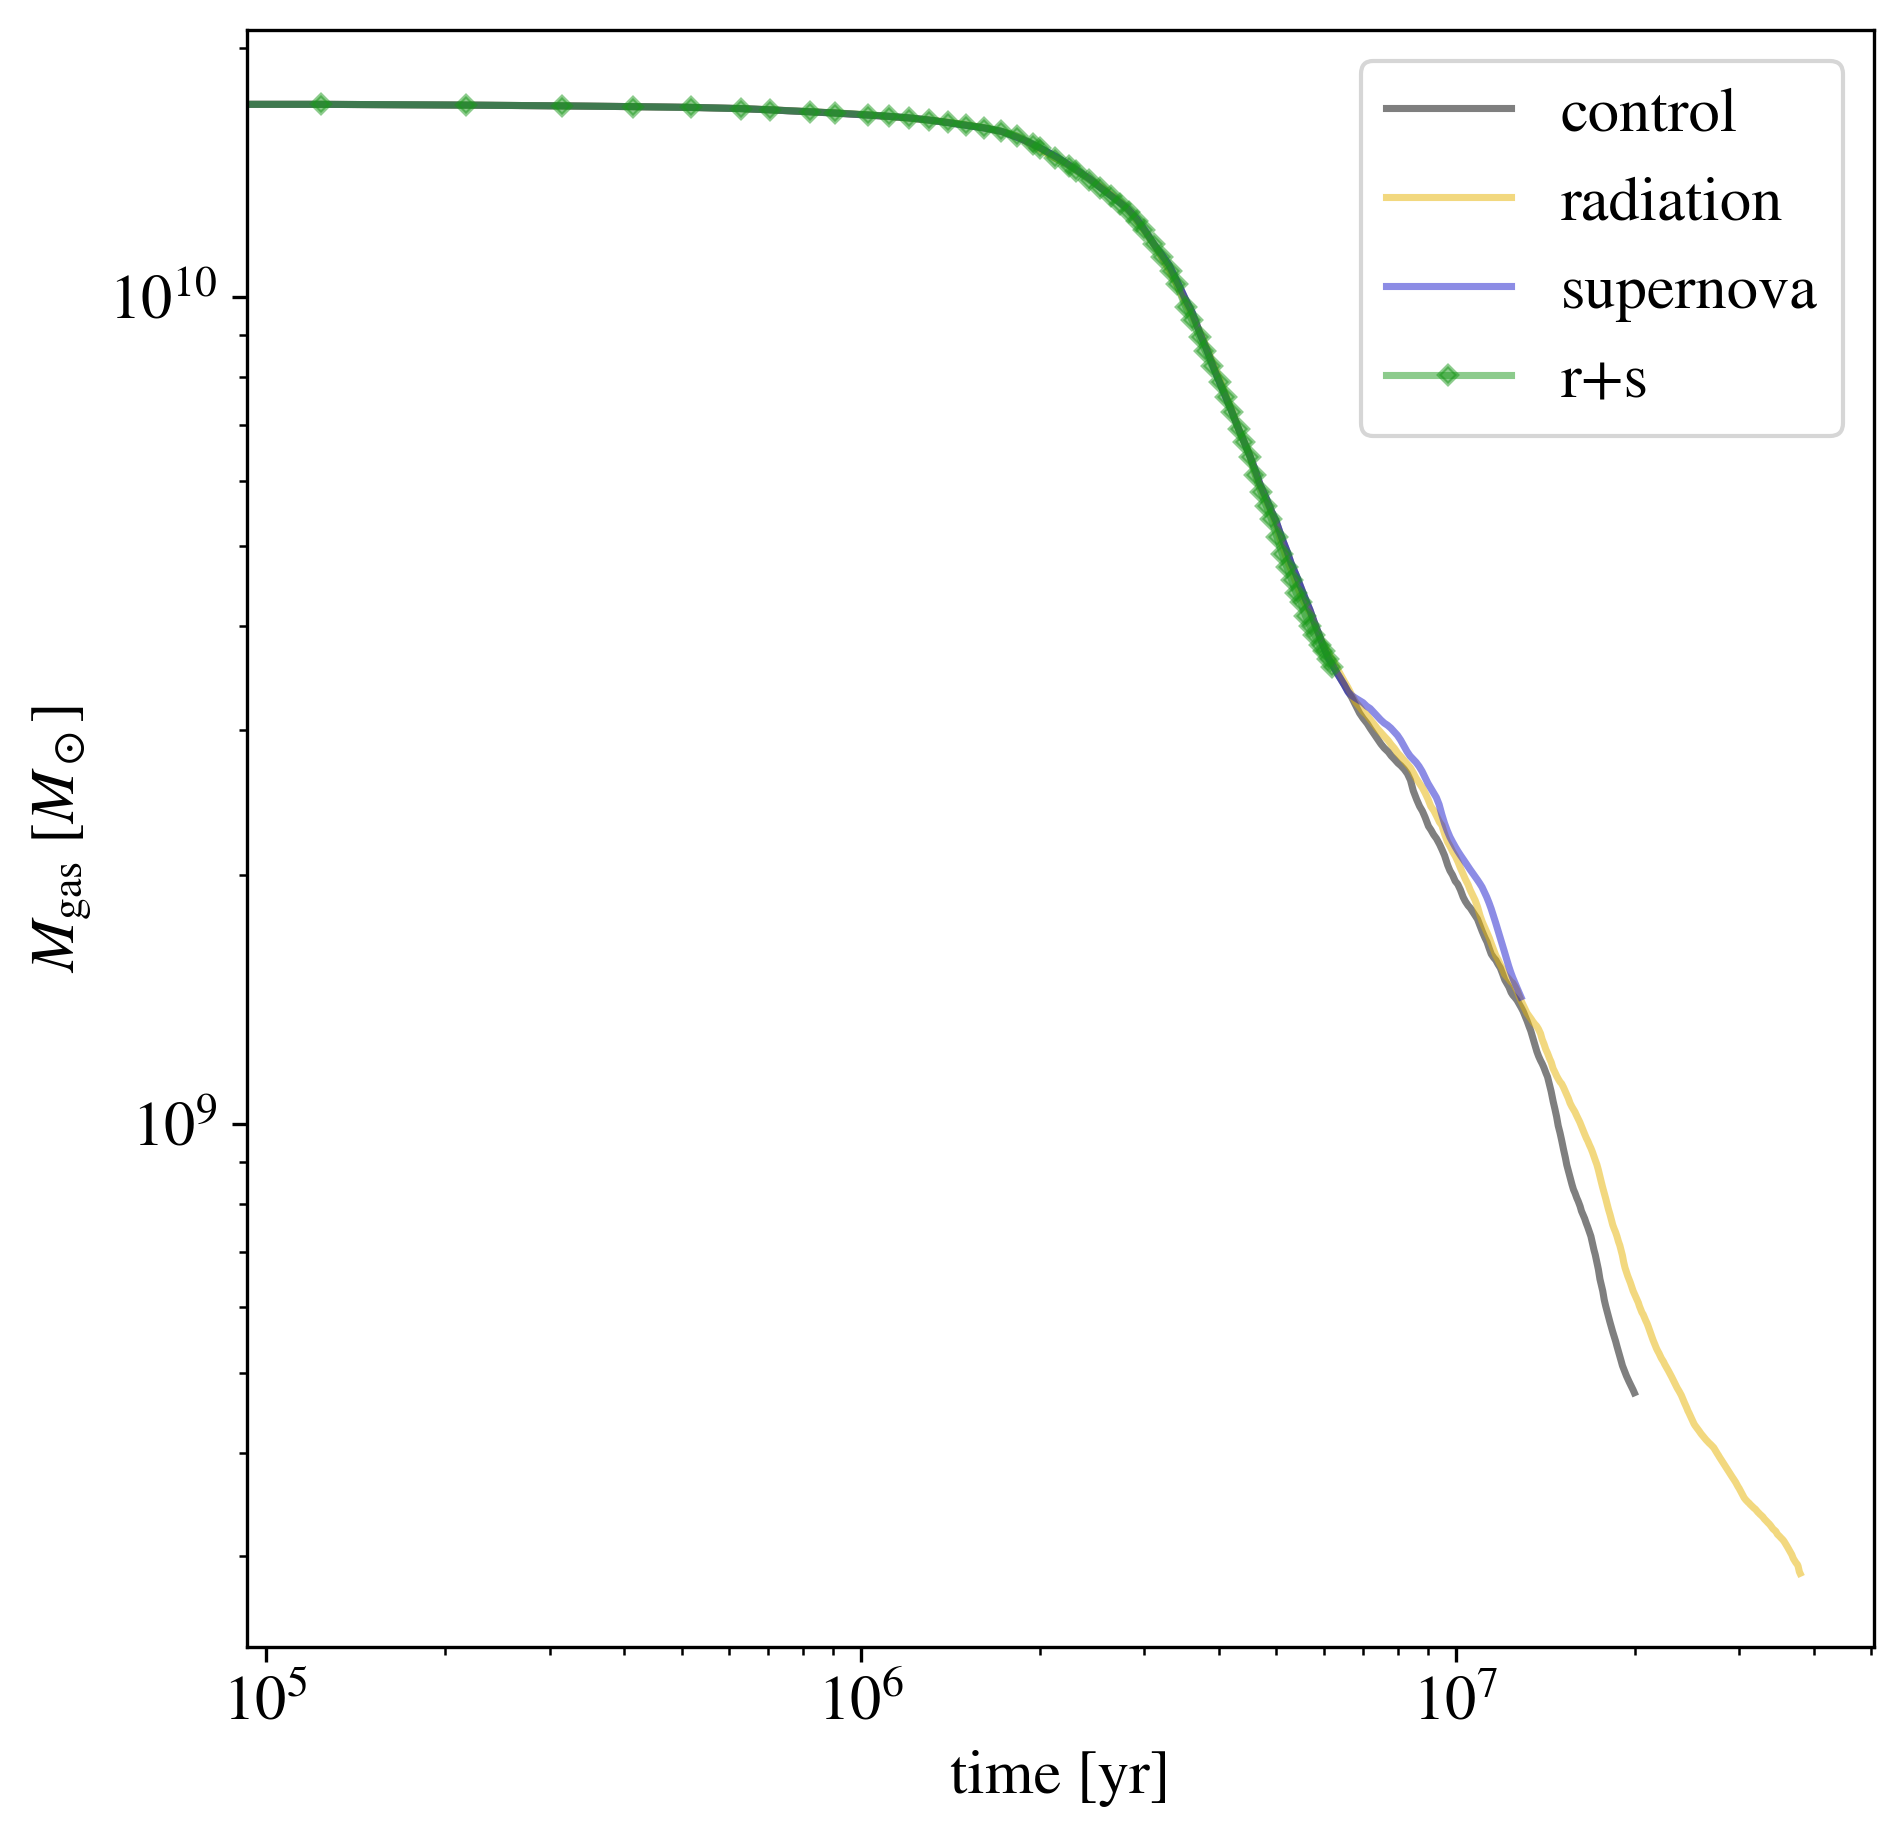

In [27]:
plt.figure(dpi=300,figsize=(7,7))

for ts,Mgs,case,mrkr,clr in zip(ts_4x,
                        Mgas_4x,
                       ['control','radiation','supernova','r+s'],
                       ['','','','D'],
                       ['black',(0.9,0.7,0.),(0.1,0.1,0.8),(0.1,0.6,0.1)]):
    
    plt.plot(ts,Mgs,label=case,marker=mrkr,ms=3,color=clr,linewidth=1.7,alpha=0.5)

plt.legend()
plt.xlabel('time [yr]')
plt.ylabel(r'$M_\mathrm{gas}\ [M_\odot$]')
plt.loglog()
plt.savefig('ozos_Mgas_vs_t',bbox_inches='tight')

In [45]:
Msink_4x = [np.zeros(201),np.zeros(381),np.zeros(130),np.zeros(63)]

In [48]:
%%time
for j in range(4):
    for i in range(Ns_done[j]): #diff number for each feedback mechanism
        try:
            yt.load(parts_4x[j][i]).particles_exist
        except:
            Msink_4x[j][i] = 0
        else:
            Msink_4x[j][i] = np.nansum(
                                    yt.load(parts_4x[j][i]).all_data()['particle_mass'].in_units('solMass').value)


yt : [INFO     ] 2025-02-06 08:43:19,904 Parameters: current_time              = 0.0
yt : [INFO     ] 2025-02-06 08:43:19,906 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-02-06 08:43:19,908 Parameters: domain_left_edge          = [-4.31995267e+21 -4.31995267e+21 -4.31995267e+21]
yt : [INFO     ] 2025-02-06 08:43:19,910 Parameters: domain_right_edge         = [4.31995267e+21 4.31995267e+21 4.31995267e+21]
yt : [INFO     ] 2025-02-06 08:43:19,911 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2025-02-06 08:43:20,144 Parameters: current_time              = 3902250095523.4453
yt : [INFO     ] 2025-02-06 08:43:20,146 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-02-06 08:43:20,147 Parameters: domain_left_edge          = [-4.31995267e+21 -4.31995267e+21 -4.31995267e+21]
yt : [INFO     ] 2025-02-06 08:43:20,149 Parameters: domain_right_edge         = [4.31995267e+21 4.31995267e+21 4.31995267e+21]
yt : [INFO     ] 2025-02-06 08:43:20

CPU times: user 22min 52s, sys: 20.9 s, total: 23min 13s
Wall time: 27min 34s


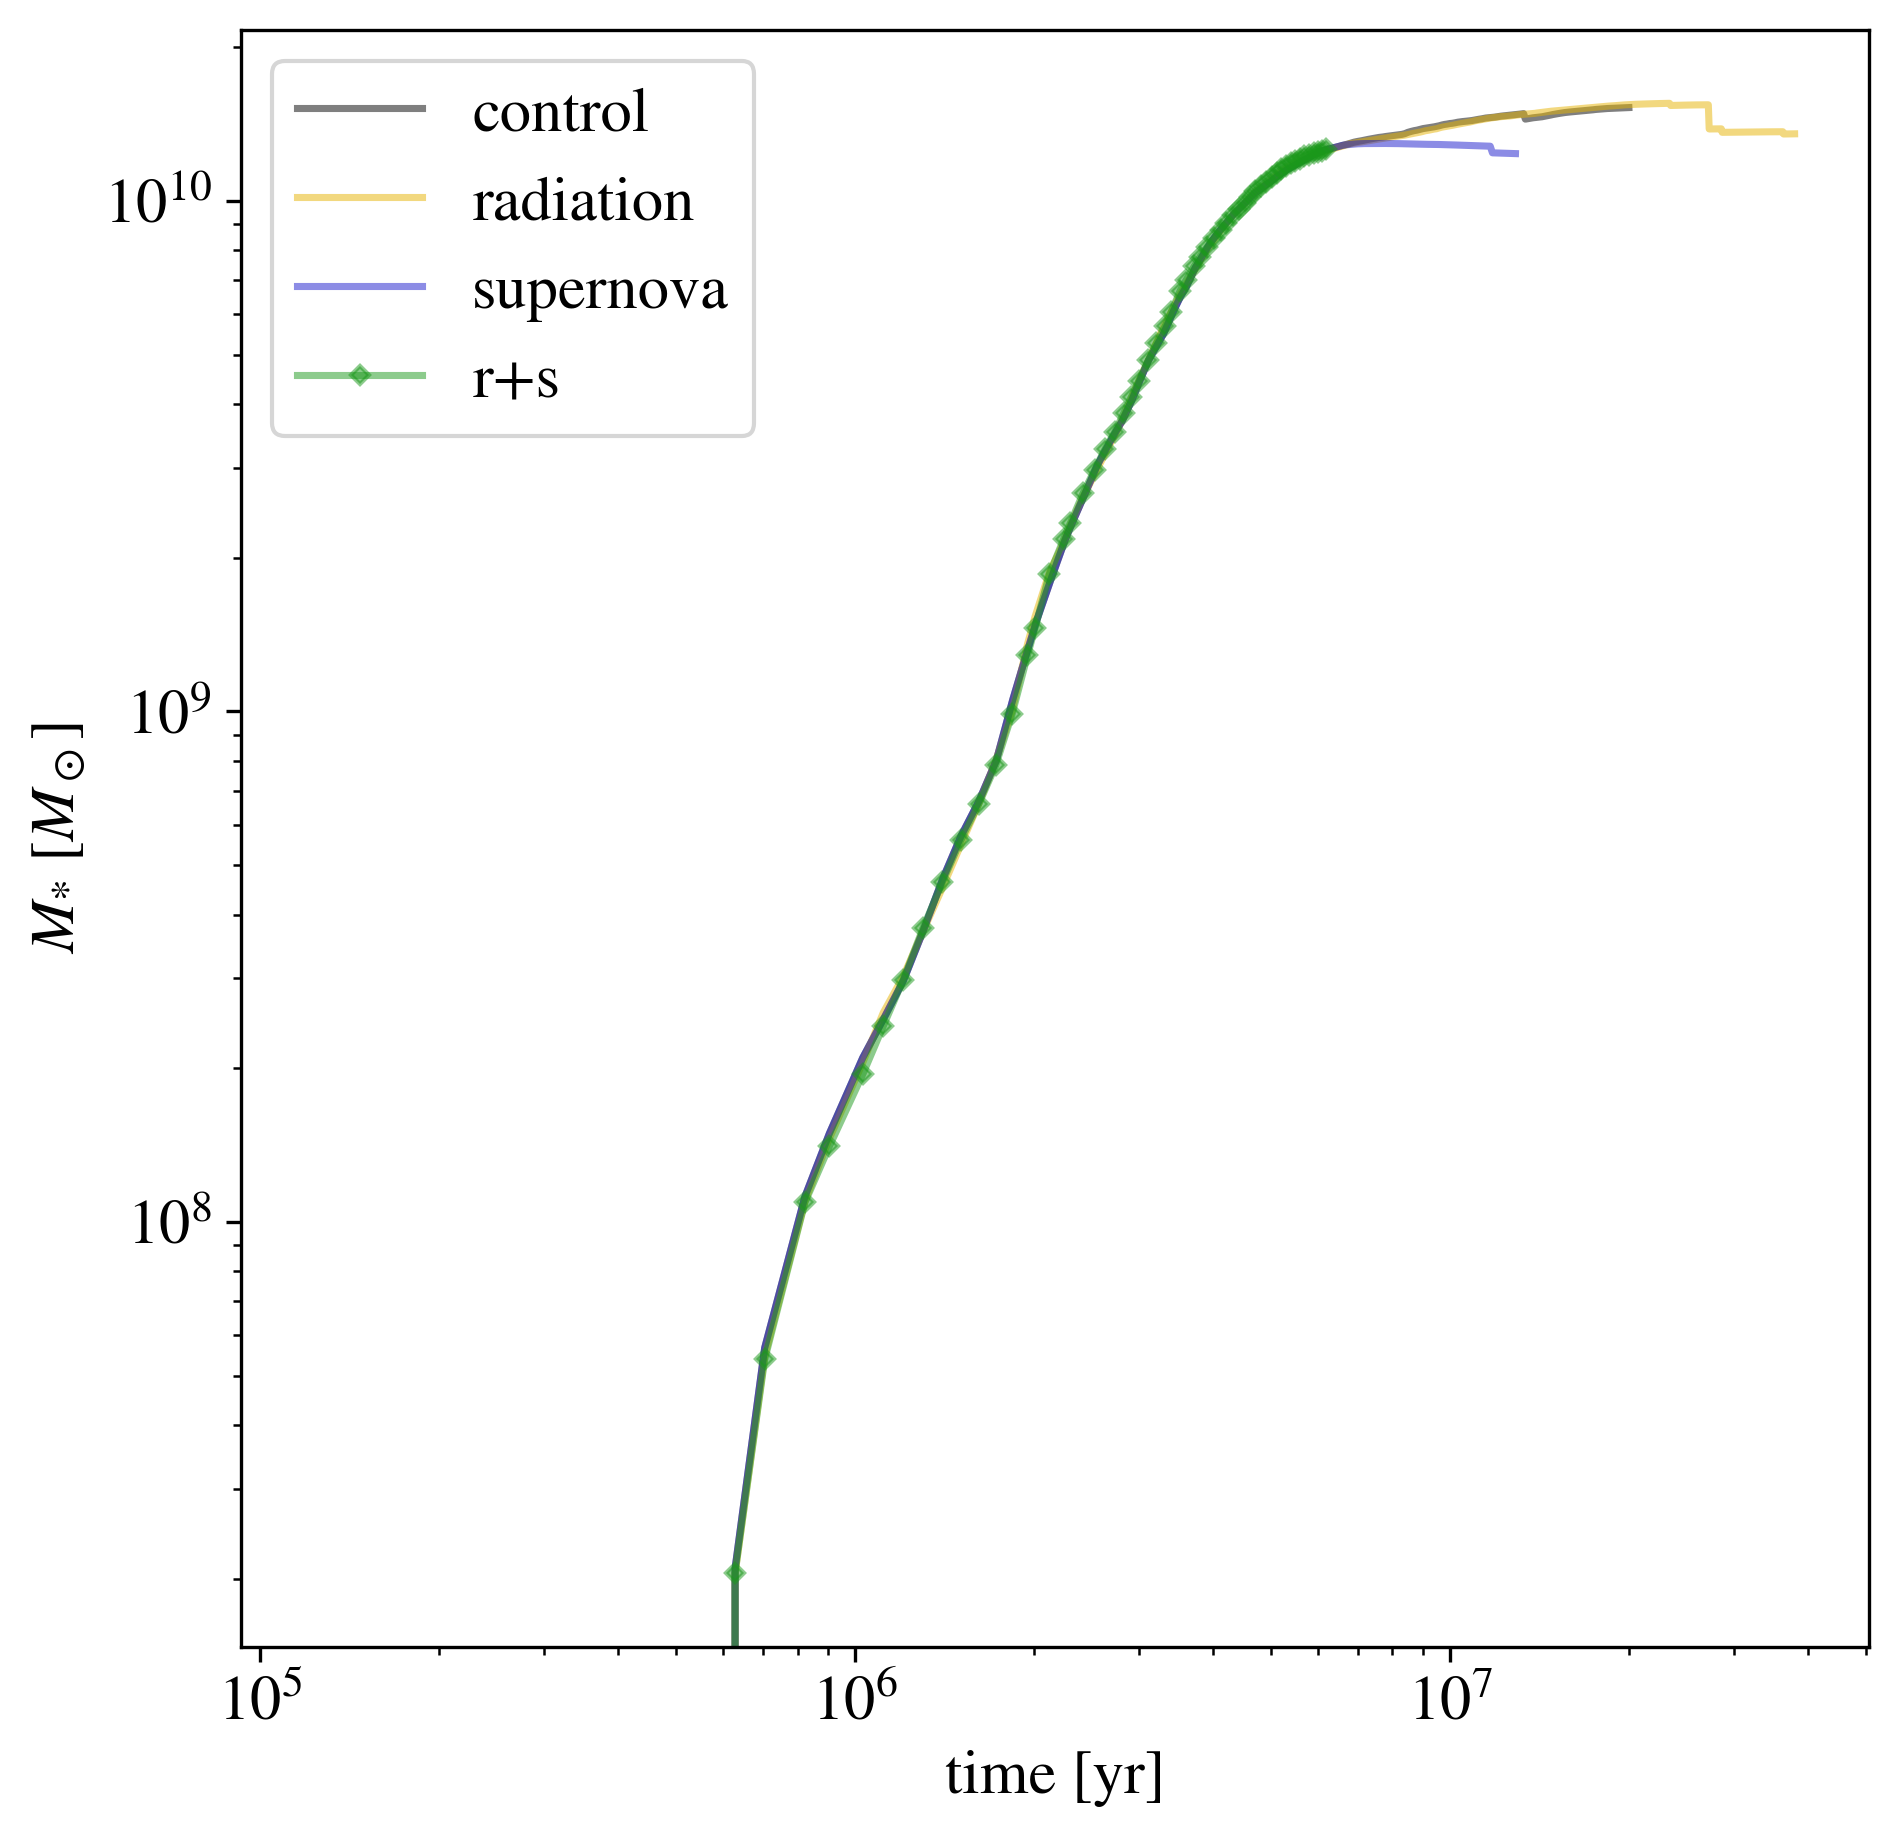

In [52]:
plt.figure(dpi=300,figsize=(7,7))

for ts,Mgs,case,mrkr,clr in zip(ts_4x,
                        Msink_4x,
                       ['control','radiation','supernova','r+s'],
                       ['','','','D'],
                       ['black',(0.9,0.7,0.),(0.1,0.1,0.8),(0.1,0.6,0.1)]):
    
    plt.plot(ts,Mgs,label=case,marker=mrkr,ms=3,color=clr,linewidth=1.7,alpha=0.5)

plt.legend()
plt.xlabel('time [yr]')
plt.ylabel(r'$M_\mathrm{*}\ [M_\odot$]')
plt.loglog()
plt.savefig('ozos_Msink_vs_t',bbox_inches='tight')

In [43]:
#plot gas mass vs time for the four cases first
#then figure out the try/except thingy for getting sink particle masses out of the particle files

In [ ]:
for case,n in zip():
    sinkM_tot = []
    for i in range(201): #diff number for each feedback mechanism
        try:
            c_part_files[i].particles_exist
        except:
            c_sinkM_tot.append(0*yt.units.solMass)
        else:
            c_sinkM_tot.append(np.nansum(c_part_files[i].all_data()['particle_mass'].in_units('solMass')))
        finally:
            print(r_sinkM_tot[i])
    
    gasM_tot = [np.nansum(c_plot_files[i].all_data()['mass']).in_units('solMass') for i in range(201)] #diff number for each feedback mechanism